In [6]:
from selenium import webdriver
from shutil import which
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException, ElementNotInteractableException
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import requests

def generate_glassdoor_url(job_name, page_number):
    base_url = "https://www.glassdoor.co.in/Job/india-"
    job_name = job_name.replace(" ", "-").lower()
    srch = f"IL.0,5_IN115_KO6,{len(job_name)+6}"
    ip = f"_IP{page_number}"
    return (f"{base_url}{job_name}-jobs-SRCH_{srch}{ip}.htm?sortBy=date_desc")

def fetch_jobs(keyword,num_pages):
    options = Options()
    options.add_argument("window-size=1920,1080")
    #Enter your chromedriver.exe path below
    chrome_path = "/home/ajay/chromedriver_linux64/chromedriver"
    driver = webdriver.Chrome(executable_path=chrome_path, options=options)
#     driver.get("https://www.glassdoor.co.in/Job/Home/recentActivity.htm")
#     search_input = driver.find_element(By.ID,"sc.keyword")
#     search_input.send_keys(keyword)
#     search_input.send_keys(Keys.ENTER)
#     #time.sleep(5)
#     search_input = driver.find_element(By.ID,"sc.location")
#     search_input.click()  # click on the input element to give it focus
#     search_input.send_keys(Keys.HOME)  # move cursor to beginning of input
#     for i in range(len(search_input.get_attribute("value"))):
#         search_input.send_keys(Keys.DELETE)  # delete existing value
#     #driver.execute_script("arguments[0].value = '';", search_input)
#     search_input.send_keys(location)
#     search_input.send_keys(Keys.ENTER)
#     time.sleep(2)
    
    driver.get(generate_glassdoor_url(keyword,num_pages))
    #driver.get(generate_glassdoor_url(keyword,1))
    
    #search_input = driver.find_element(By.ID,"sc.keyword")
    #search_input.send_keys(keyword)
    #search_input.send_keys(Keys.ENTER)
    #time.sleep(5)
    #search_input = driver.find_element(By.ID,"sc.location")
    #search_input.click()  # click on the input element to give it focus
    #search_input.send_keys(Keys.HOME)  # move cursor to beginning of input
    #for i in range(len(search_input.get_attribute("value"))):
        #search_input.send_keys(Keys.DELETE)  # delete existing value
    #driver.execute_script("arguments[0].value = '';", search_input)
    #search_input.send_keys(location)
    #search_input.send_keys(Keys.ENTER)
    #time.sleep(2)
    
    

    

    
    
    
    
    
    
    
    company_name = []
    job_title = []
    location = []
    job_description = []
    avg_base_pay_est = []
    company_rating=[]
    company_link=[]
    time_since_posted=[]
    company_skills=[]
#     company_size = []
#     company_type = []
#     company_sector = []
#     company_industry = []
#     company_founded = []
#     company_revenue = []
#     company_link=[]
    html=[]
    
    
    
    #Set current page to 1
    current_page = 1     
        
        
    time.sleep(3)
    
    while current_page <= num_pages:   
        #temp=[]
        
        done = False
        while not done:
            job_cards = driver.find_elements(By.XPATH,"//article[@id='MainCol']//ul/li[@data-adv-type='GENERAL']")
            for count,card in enumerate(job_cards):
                card.click()
                time.sleep(0.3)

                #Closes the signup prompt
                try:
                    driver.find_element(By.XPATH,".//span[@class='SVGInline modal_closeIcon']").click()
                    time.sleep(2)
                except NoSuchElementException:
                    time.sleep(2)
                    pass

                #Expands the Description section by clicking on Show More
#                 try:
#                     driver.find_element(By.XPATH,"//div[@class='css-t3xrds e856ufb4']").click()
#                     #css-t3xrds e856ufb4
#                     time.sleep(1)
#                 except NoSuchElementException:
#                     card.click()
#                     print(str(current_page) + '#ERROR: no such element')
#                     time.sleep(30)
#                     driver.find_element(By.XPATH,"//div[@class='css-t3xrds e856ufb4']").click()
#                 except ElementNotInteractableException:
#                     card.click()
#                     driver.implicitly_wait(30)
#                     print(str(current_page) + '#ERROR: not interactable')
#                     driver.find_element(By.XPATH,"//div[@class='css-t3xrds e856ufb4']").click()

#                 #Scrape 

#                 try:
#                     company_name.append(driver.find_element(By.XPATH,"//div[@class='css-87uc0g e1tk4kwz1']").text)
#                     #css-87uc0g e1tk4kwz1
#                 except:
#                     company_name.append("#N/A")
#                     pass

#                 try:
#                     job_title.append(driver.find_element(By.XPATH,"//div[@class='css-1vg6q84 e1tk4kwz4']").text)
#                 except:
#                     job_title.append("#N/A")
#                     pass
#                 #jobLink css-1rd3saf eigr9kq2
                
#                 #link_element = driver.find_element_by_class_name("gd-ui-button")


# #                 try:
# #                     #job_title.append(driver.find_element(By.CLASS_NAME,"//div[@class='css-1vg6q84 e1tk4kwz4']").text)
# #                     elements = driver.find_elements(By.CLASS_NAME,"jobLink css-1rd3saf eigr9kq2")
# #                     #print(link_element)
# #                     for element in elements:
# #                         href = element.get_attribute("href")
# #                     company_link.append(href)    
# #                     link_href = link_element.get_attribute("href")
# #         for element in elements:
# #     href = element.get_attribute("href")
# #                     company_link.append(link_href)
# #                 except:
# #                     company_link.append("#N/A")
# #                     pass

#                 try:
#                     location.append(driver.find_element(By.XPATH,"//div[@class='css-56kyx5 e1tk4kwz5']").text)
#                 except:
#                     location.append("#N/A")
#                     pass

#                 try:
#                     job_description.append(driver.find_element(By.XPATH,"//div[@id='JobDescriptionContainer']").text)
#                 except:
#                     job_description.append("#N/A")
#                     pass

#                 try:
#                     salary_estimate.append(driver.find_element(By.XPATH,"//div[@class='css-1bluz6i e2u4hf13']").text)
#                     #driver.find_element(By.CSS_SELECTOR, "span[data-test='detailSalary']")
#                     #salary_element = driver.find_element_by_class_name("css-1xe2xww")
#                 except:
#                     salary_estimate.append("#N/A")
#                     pass
                
#                 try:
#                     company_size.append(driver.find_element(By.XPATH,"//div[@id='CompanyContainer']//span[text()='Size']//following-sibling::*").text)
#                 except:
#                     company_size.append("#N/A")
#                     pass
                
#                 try:
#                     company_type.append(driver.find_element(By.XPATH,"//div[@id='CompanyContainer']//span[text()='Type']//following-sibling::*").text)
#                 except:
#                     company_type.append("#N/A")
#                     pass
                    
#                 try:
#                     company_sector.append(driver.find_element(By.XPATH,"//div[@id='CompanyContainer']//span[text()='Sector']//following-sibling::*").text)
#                 except:
#                     company_sector.append("#N/A")
#                     pass
                    
#                 try:
#                     company_industry.append(driver.find_element(By.XPATH,"//div[@id='CompanyContainer']//span[text()='Industry']//following-sibling::*").text)
#                 except:
#                     company_industry.append("#N/A")
#                     pass
                    
#                 try:
#                     company_founded.append(driver.find_element(By.XPATH,"//div[@id='CompanyContainer']//span[text()='Founded']//following-sibling::*").text)
#                 except:
#                     company_founded.append("#N/A")
#                     pass
                    
#                 try:
#                     company_revenue.append(driver.find_element(By.XPATH,"//div[@id='CompanyContainer']//span[text()='Revenue']//following-sibling::*").text)
#                 except:
#                     company_revenue.append("#N/A")
#                     pass
                    
                    
                html.append(driver.page_source)
                    
                done = True
#         elements = driver.find_elements(By.CLASS_NAME,"jobLink css-1rd3saf eigr9kq2")
#         for element in elements:
#             href = element.get_attribute("href")
#             if href is not None:
#                 company_link.append(href)  
#             else:
#                 company_link.append("#N/A")
#         print(company_link)        
                
       # Moves to the next page        
        #html.append(driver.page_source)
#         soup = BeautifulSoup(html, 'html.parser')
#         a_tags = soup.find_all('a', {'class': 'jobLink css-1rd3saf eigr9kq2'})
#         for a_tag in a_tags:
#             company_link.append("glassdoor.co.in"+a_tag['href'])
        
        if done:
            print(str(current_page) + ' ' + 'out of' +' '+ str(num_pages) + ' ' + 'pages done')
            driver.find_element(By.XPATH,"//span[@alt='next-icon']").click()   
            current_page = current_page + 1
            time.sleep(4)
            




    driver.close()
    for i in html:
        soup = BeautifulSoup(i, 'html.parser')
        try:
            company_name.append(soup.find('div', {'class': 'css-87uc0g e1tk4kwz1'}).text)
        except:
            company_name.append("#N/A")
        try:
            job_title.append(soup.find('div', {'class': 'css-1vg6q84 e1tk4kwz4'}).text)
        except:
            job_title.append("#N/A")
        try:
            location.append(soup.find('div', {'class': 'css-56kyx5 e1tk4kwz5'}).text)
        except:
            location.append("#N/A")  
        try:
            avg_base_pay_est.append(soup.find('div', {'class': 'css-1bluz6i e2u4hf13'}).text)
        except:
            avg_base_pay_est.append("#N/A")  
        try:
            time_since_posted.append(soup.find('div', {'class': 'd-flex align-items-end pl-std css-1vfumx3'}).text)
        except:
            time_since_posted.append("#N/A")    
        try:
            company_rating.append(soup.find('span', {'class': 'css-1m5m32b e1tk4kwz2'}).text)
        except:
            company_rating.append("#N/A")
        
        try:   
            job_description.append(soup.find('div', {'class': 'css-jrwyhi e856ufb5'}).text)
        except:
            job_description.append("#N/A")
            
        a_tags = soup.find_all('div', {'class': 'p-std css-1k5huso e856ufb0'})

        try:
            #print(x)
            #x+=1
            text=a_tags[0].text
        # Define regular expressions to match languages, frameworks, and databases
            language_regex = re.compile(r"\b(ada|algol|assembly|awk|bash|c(\+\+|#)?|cobol|css|coffeescript|d|dart|delphi|elixir|elm|erlang|f#|fortran|go|groovy|haskell|html|java|javascript|julia|kotlin|lisp|lua|matlab|objective-c|ocaml|pascal|perl|php|powershell|prolog|python|r|ruby|rust|scala|scheme|scratch|shell|smalltalk|sql|swift|tcl|typescript|vb\.net|visual basic)\b", re.IGNORECASE)

            framework_regex = re.compile(r"\b(angular|aurelia|backbone\.js|react|bootstrap|bulma|cakephp|cherrypy|django|docker|ember\.js|express|fastapi|feathers\.js|flask|gatsby\.js|google cloud platform|grails|hapi\.js|hugo|ibm cloud|ionic|jest|jquery|koa|laravel|loopback|meteor|nestjs|next\.js|nuxt\.js|openstack|phoenix|polymer|pyramid|quasar|react\.js|redux|restify|ruby on rails|sails\.js|sanic|serverless|sinatra|selenium|socket\.io|strapi|styled-components|symfony|thunderbird|tornado|turboGears|uwsgi|vaadin|vue|vuex|wxWidgets|yarn|yesod|zepto)\b", re.IGNORECASE)

            database_regex = re.compile(r"\b(cassandra|couchbase|couchdb|firebase|mongodb|ms sql|mysql|oracle|postgresql|redis|sqlite)\b", re.IGNORECASE)

            skills_regex = re.compile(r"\b(amazon web services|aws|ansible|apache kafka|apache mesos|apache zookeeper|aws cloudformation|aws cloudwatch|aws lambda|azure|chef|circleci|cloudflare|docker|gcp|git|github|gitlab|jenkins|kubernetes|logstash|nginx|prometheus|puppet|redis|terraform|travis ci)\b", re.IGNORECASE)
            # Extract the languages, frameworks, and databases from the text
            languages = language_regex.findall(text)
            frameworks = framework_regex.findall(text)
            databases = database_regex.findall(text)
            skills=skills_regex.findall(text)

            unique_languages = list(set([lang[0].lower() for lang in languages]))
        #     unique_frameworks = list(set(frameworks))
        #     unique_databases= list(set(databases))
        #     unique_skills=list(set(skills))
            unique_frameworks = list(set(unique.lower() for unique in frameworks))
            unique_databases = list(set(unique.lower() for unique in databases))
            unique_skills = list(set(unique.lower() for unique in skills))


            #print(unique_languages)print(unique_frameworks)
            #print(unique_databases)
            temp=unique_databases+unique_frameworks+unique_languages+unique_skills
            company_skills.append(temp)
        except:
            company_skills.append([])    
        
        
        
    a_tags = soup.find_all('a', {'class': 'jobLink css-1rd3saf eigr9kq2'})
    for i in range(len(a_tags)):
        try:
            company_link.append("https://glassdoor.co.in"+a_tags[i]["href"])
        except:
            company_link.append("#N/A")       
            
      
            
            
        
#     print(len(company_name))
#     print(len(company_links))
#     print(len(company_rating))
#     print(len(time_since_posted))
#     print(len(job_description))
    print(len(company_skills))
    df = pd.DataFrame({'company_name': company_name,
    'job title': job_title,
    #'skills':company_skills, not working for all cases check it
    'company_link':company_link,
    'location': location,
    'job description': job_description,
    'avg_salary_estimate': avg_base_pay_est,
    'company_rating':company_rating,
    'time_since_post':time_since_posted })
    #df = df.iloc[:, :-6]
    #df=df.dropna()
    
    
    df.to_csv(keyword +  '.csv',index=False)
    # also make it multipage doesnt work for multiple pages ig

In [7]:
fetch_jobs("Backend Developer",1)

/tmp/ipykernel_3287/324931073.py:26: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=chrome_path, options=options)


1 out of 1 pages done
30


In [8]:
df=pd.read_csv("/home/ajay/Backend Developer.csv")

In [9]:
df

,company_name,job title,company_link,location,job description,avg_salary_estimate,company_rating,time_since_post
0,Uubex,Front End Developer,https://glassdoor.co.in/partner/jobListing.htm...,Remote,Work from home doing frontend programming. Uub...,"₹32,692 /mo (est.)",NaN,24h
1,Nouveau Labs4.2,Python Developer,https://glassdoor.co.in/partner/jobListing.htm...,Bangalore,About Nouveau Labs :\nNouveau Labs Pvt. Ltd. i...,"₹7,07,526 /yr (est.)",4.2,24h
2,Spintly4.5,S/W DEVELOPER BACKEND,https://glassdoor.co.in/partner/jobListing.htm...,India,Spintly is looking for a Software Developer (B...,NaN,4.5,24h
3,Xamtac Consulting,Jr. Backend Developer,https://glassdoor.co.in/partner/jobListing.htm...,Bangalore,Job Type: Full-timeJob Summary: We are seeking...,"₹25,000 /mo (est.)",NaN,24h
4,Flipkart4.1,UI Engineer III,https://glassdoor.co.in/partner/jobListing.htm...,Bangalore,UI Engineer III\n\n\nAbout Flipkart Health+:\n...,"₹2,38,630 /yr (est.)",4.1,24h
5,Brand Provoke Consultants4.2,Backend Developer,https://glassdoor.co.in/partner/jobListing.htm...,New Delhi,Job Role:\nThe backend developer is responsibl...,"₹4,24,264 /yr (est.)",4.2,24h
6,NaN,NaN,https://glassdoor.co.in/partner/jobListing.htm...,NaN,NaN,NaN,NaN,24h
7,Brand Provoke Consultants4.2,Frontend Developer,https://glassdoor.co.in/partner/jobListing.htm...,New Delhi,Job Role:\nAbility to convert Wireframes and X...,"₹3,82,128 /yr (est.)",4.2,24h
8,Spintly4.5,FULL STACK DEVELOPER,https://glassdoor.co.in/partner/jobListing.htm...,Goa,We at Spintly India Private Limited are lookin...,NaN,4.5,24h
9,Whiteforce3.4,Backend Developers,https://glassdoor.co.in/partner/jobListing.htm...,Bangalore,Employment Information\nIndustry Backend Devel...,"₹4,83,735 /yr (est.)",3.4,24h


In [ ]:
#d-flex align-items-end pl-std css-1vfumx3 for date i think its wrong

In [145]:
company_name = soup.find('div', {'class': 'css-87uc0g e1tk4kwz1'}).text

In [146]:
company_name

'Synctric Technology Pvt. Ltd.'

In [129]:
job_title = soup.find('div', {'class': 'css-1vg6q84 e1tk4kwz4'}).text

In [130]:
job_title

'ReactJS Developer'

In [131]:
location = soup.find('div', {'class': 'css-56kyx5 e1tk4kwz5'}).text

In [132]:
location

'Hyderābād'

In [133]:
avg_base_pay_est = soup.find('div', {'class': 'css-1bluz6i e2u4hf13'})
try:
    avg_base_pay_est=soup.find('div', {'class': 'css-1bluz6i e2u4hf13'}).text
except:
    avg_bas_pay_est="Estimate not available"

In [134]:
avg_base_pay_est

'₹3,54,965\xa0/yr (est.)'

In [135]:
time_since_posted = soup.find('div', {'class': 'd-flex align-items-end pl-std css-1vfumx3'}).text

In [136]:
time_since_posted

'24h'

In [139]:
company_rating = soup.find('span', {'class': 'css-2lqh28 e1cjmv6j1'}).text

In [140]:
company_rating

'4.4'

In [164]:
job_desc = soup.find('div', {'class': 'css-jrwyhi e856ufb5'}).text

In [165]:
job_desc

"Job descriptionResponsibilitiesDeveloping new user-facing features using React.js (Flux/ Redux)Translating designs and wireframes into high-quality codeAssume ownership of code throughout development, staging, testing and productionEvaluate code to ensure that it is valid, properly structured, meets industry standards and is compatible with browsers, devices, or operating systemsLiaise with relevant business and technical teams in relation to delivering solutionsRequirementsExperience developing web applications with modern JavaScript programming frameworks, tooling and librariesExpert knowledge of JavaScript, CSS, HTML and related web technologiesExperience with popular React.js workflows (such as Flux or Redux)Strong Computer Science fundamentals with competencies in software design, data structures and problem-solvingExperience with API integration and developmentExperience designing, coding, and testing applications in ReactJS.Knowledge of Reacts wide family of libraries and toolc

In [141]:
x=0
company_skills=[]
for i in range(len(df)):
    json=df.iloc[i]["company_json"]
    soup = BeautifulSoup(json, 'html.parser')
    a_tags = soup.find_all('div', {'class': 'p-std css-1k5huso e856ufb0'})

    try:
        print(x)
        x+=1
        text=a_tags[0].text
    # Define regular expressions to match languages, frameworks, and databases
        language_regex = re.compile(r"\b(ada|algol|assembly|awk|bash|c(\+\+|#)?|cobol|css|coffeescript|d|dart|delphi|elixir|elm|erlang|f#|fortran|go|groovy|haskell|html|java|javascript|julia|kotlin|lisp|lua|matlab|objective-c|ocaml|pascal|perl|php|powershell|prolog|python|r|ruby|rust|scala|scheme|scratch|shell|smalltalk|sql|swift|tcl|typescript|vb\.net|visual basic)\b", re.IGNORECASE)

        framework_regex = re.compile(r"\b(angular|aurelia|backbone\.js|react|bootstrap|bulma|cakephp|cherrypy|django|docker|ember\.js|express|fastapi|feathers\.js|flask|gatsby\.js|google cloud platform|grails|hapi\.js|hugo|ibm cloud|ionic|jest|jquery|koa|laravel|loopback|meteor|nestjs|next\.js|nuxt\.js|openstack|phoenix|polymer|pyramid|quasar|react\.js|redux|restify|ruby on rails|sails\.js|sanic|serverless|sinatra|selenium|socket\.io|strapi|styled-components|symfony|thunderbird|tornado|turboGears|uwsgi|vaadin|vue|vuex|wxWidgets|yarn|yesod|zepto)\b", re.IGNORECASE)

        database_regex = re.compile(r"\b(cassandra|couchbase|couchdb|firebase|mongodb|ms sql|mysql|oracle|postgresql|redis|sqlite)\b", re.IGNORECASE)

        skills_regex = re.compile(r"\b(amazon web services|aws|ansible|apache kafka|apache mesos|apache zookeeper|aws cloudformation|aws cloudwatch|aws lambda|azure|chef|circleci|cloudflare|docker|gcp|git|github|gitlab|jenkins|kubernetes|logstash|nginx|prometheus|puppet|redis|terraform|travis ci)\b", re.IGNORECASE)
        # Extract the languages, frameworks, and databases from the text
        languages = language_regex.findall(text)
        frameworks = framework_regex.findall(text)
        databases = database_regex.findall(text)
        skills=skills_regex.findall(text)

        unique_languages = list(set([lang[0].lower() for lang in languages]))
    #     unique_frameworks = list(set(frameworks))
    #     unique_databases= list(set(databases))
    #     unique_skills=list(set(skills))
        unique_frameworks = list(set(unique.lower() for unique in frameworks))
        unique_databases = list(set(unique.lower() for unique in databases))
        unique_skills = list(set(unique.lower() for unique in skills))


        #print(unique_languages)print(unique_frameworks)
        #print(unique_databases)
        temp=unique_databases+unique_frameworks+unique_languages+unique_skills
        company_skills.append(temp)
    except:
        skills.append("#N/A")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [158]:
company_skills

[['react', 'angular', 'vue', 'typescript', 'javascript'],
 ['bootstrap', 'css', 'sql', 'javascript', 'c'],
 ['react', 'c'],
 ['react', 'redux', 'css', 'php', 'javascript', 'html'],
 ['jquery', 'redux', 'css', 'javascript'],
 ['react', 'jquery', 'redux', 'css', 'javascript'],
 ['jquery', 'redux', 'bootstrap', 'html', 'javascript', 'css'],
 ['jquery', 'redux', 'css', 'javascript'],
 ['jquery', 'redux', 'css', 'javascript'],
 ['docker',
  'ibm cloud',
  'typescript',
  'sql',
  'c',
  'docker',
  'azure',
  'kubernetes',
  'git'],
 ['bootstrap', 'jest', 'html', 'css', 'git'],
 ['postgresql', 'mongodb', 'java', 'sql'],
 ['python', 'c++', 'java'],
 ['postgresql',
  'oracle',
  'react',
  'jquery',
  'redux',
  'bootstrap',
  'python',
  'r',
  'html',
  'javascript',
  'sql',
  'typescript',
  'css',
  'c',
  'azure'],
 ['react',
  'jquery',
  'html',
  'javascript',
  'css',
  'github',
  'azure',
  'aws',
  'gcp',
  'kubernetes'],
 ['react', 'yarn', 'redux', 'bootstrap', 'typescript', 'cs

In [159]:
company_skills.append("#N/A")

In [161]:
dfx=pd.DataFrame(company_skills)

In [162]:
dfx

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,react,angular,vue,typescript,javascript,None,None,None,None,None,None,None,None,None,None
1,bootstrap,css,sql,javascript,c,None,None,None,None,None,None,None,None,None,None
2,react,c,None,None,None,None,None,None,None,None,None,None,None,None,None
3,react,redux,css,php,javascript,html,None,None,None,None,None,None,None,None,None
4,jquery,redux,css,javascript,None,None,None,None,None,None,None,None,None,None,None
5,react,jquery,redux,css,javascript,None,None,None,None,None,None,None,None,None,None
6,jquery,redux,bootstrap,html,javascript,css,None,None,None,None,None,None,None,None,None
7,jquery,redux,css,javascript,None,None,None,None,None,None,None,None,None,None,None
8,jquery,redux,css,javascript,None,None,None,None,None,None,None,None,None,None,None
9,docker,ibm cloud,typescript,sql,c,docker,azure,kubernetes,git,None,None,None,None,None,None


In [147]:
a_tags = soup.find_all('a', {'class': 'jobLink css-1rd3saf eigr9kq2'})

# extract the href links from the anchor tags


In [157]:
for i in range(len(a_tags)):
    print("https://glassdoor.co.in"+a_tags[i]["href"])

https://glassdoor.co.in/partner/jobListing.htm?pos=101&ao=1136043&s=58&guid=00000187c46b6c75b47cb1716af15d55&src=GD_JOB_AD&t=SR&vt=w&ea=1&cs=1_e7617169&cb=1682627587437&jobListingId=1008613450959&jrtk=3-0-1gv26mr4l20b3001-1gv26mr58gsqs800-0ee32fec8fb56776-
https://glassdoor.co.in/partner/jobListing.htm?pos=102&ao=1136043&s=58&guid=00000187c46b6c75b47cb1716af15d55&src=GD_JOB_AD&t=SR&vt=w&cs=1_f8bce510&cb=1682627587437&jobListingId=1008613445470&jrtk=3-0-1gv26mr4l20b3001-1gv26mr58gsqs800-eca87ec73e989964-
https://glassdoor.co.in/partner/jobListing.htm?pos=103&ao=1136043&s=58&guid=00000187c46b6c75b47cb1716af15d55&src=GD_JOB_AD&t=SR&vt=w&cs=1_822370cf&cb=1682627587437&jobListingId=1008613613603&jrtk=3-0-1gv26mr4l20b3001-1gv26mr58gsqs800-3a799a0ec9620184-
https://glassdoor.co.in/partner/jobListing.htm?pos=104&ao=1136043&s=58&guid=00000187c46b6c75b47cb1716af15d55&src=GD_JOB_AD&t=SR&vt=w&ea=1&cs=1_deaf71fd&cb=1682627587437&jobListingId=1008613440338&jrtk=3-0-1gv26mr4l20b3001-1gv26mr58gsqs800-

In [109]:
a_tags = soup.find_all('a', {'class': 'jobLink css-1rd3saf eigr9kq2'})

# extract the href links from the anchor tags
company_links = ["https://glassdoor.co.in"+ a_tag['href'] for a_tag in a_tags]

print(company_links)

['https://glassdoor.co.in/partner/jobListing.htm?pos=101&ao=1136043&s=58&guid=00000187c46b6c75b47cb1716af15d55&src=GD_JOB_AD&t=SR&vt=w&ea=1&cs=1_e7617169&cb=1682627587437&jobListingId=1008613450959&jrtk=3-0-1gv26mr4l20b3001-1gv26mr58gsqs800-0ee32fec8fb56776-', 'https://glassdoor.co.in/partner/jobListing.htm?pos=102&ao=1136043&s=58&guid=00000187c46b6c75b47cb1716af15d55&src=GD_JOB_AD&t=SR&vt=w&cs=1_f8bce510&cb=1682627587437&jobListingId=1008613445470&jrtk=3-0-1gv26mr4l20b3001-1gv26mr58gsqs800-eca87ec73e989964-', 'https://glassdoor.co.in/partner/jobListing.htm?pos=103&ao=1136043&s=58&guid=00000187c46b6c75b47cb1716af15d55&src=GD_JOB_AD&t=SR&vt=w&cs=1_822370cf&cb=1682627587437&jobListingId=1008613613603&jrtk=3-0-1gv26mr4l20b3001-1gv26mr58gsqs800-3a799a0ec9620184-', 'https://glassdoor.co.in/partner/jobListing.htm?pos=104&ao=1136043&s=58&guid=00000187c46b6c75b47cb1716af15d55&src=GD_JOB_AD&t=SR&vt=w&ea=1&cs=1_deaf71fd&cb=1682627587437&jobListingId=1008613440338&jrtk=3-0-1gv26mr4l20b3001-1gv26m

In [43]:
len(df)

30

In [44]:
href_links[10]

'https://glassdoor.co.in/partner/jobListing.htm?pos=111&ao=1136043&s=58&guid=00000187c46b6c75b47cb1716af15d55&src=GD_JOB_AD&t=SR&vt=w&cs=1_876ff782&cb=1682627587438&jobListingId=1008613028038&jrtk=3-0-1gv26mr4l20b3001-1gv26mr58gsqs800-503c05116a3ab8e5-'

In [45]:
import re

In [46]:
x=0
company_skills=[]
for i in range(len(df)):
    json=df.iloc[i]["company_json"]
    soup = BeautifulSoup(json, 'html.parser')
    a_tags = soup.find_all('div', {'class': 'p-std css-1k5huso e856ufb0'})

    try:
        print(x)
        x+=1
        text=a_tags[0].text
    # Define regular expressions to match languages, frameworks, and databases
        language_regex = re.compile(r"\b(ada|algol|assembly|awk|bash|c(\+\+|#)?|cobol|css|coffeescript|d|dart|delphi|elixir|elm|erlang|f#|fortran|go|groovy|haskell|html|java|javascript|julia|kotlin|lisp|lua|matlab|objective-c|ocaml|pascal|perl|php|powershell|prolog|python|r|ruby|rust|scala|scheme|scratch|shell|smalltalk|sql|swift|tcl|typescript|vb\.net|visual basic)\b", re.IGNORECASE)

        framework_regex = re.compile(r"\b(angular|aurelia|backbone\.js|react|bootstrap|bulma|cakephp|cherrypy|django|docker|ember\.js|express|fastapi|feathers\.js|flask|gatsby\.js|google cloud platform|grails|hapi\.js|hugo|ibm cloud|ionic|jest|jquery|koa|laravel|loopback|meteor|nestjs|next\.js|nuxt\.js|openstack|phoenix|polymer|pyramid|quasar|react\.js|redux|restify|ruby on rails|sails\.js|sanic|serverless|sinatra|selenium|socket\.io|strapi|styled-components|symfony|thunderbird|tornado|turboGears|uwsgi|vaadin|vue|vuex|wxWidgets|yarn|yesod|zepto)\b", re.IGNORECASE)

        database_regex = re.compile(r"\b(cassandra|couchbase|couchdb|firebase|mongodb|ms sql|mysql|oracle|postgresql|redis|sqlite)\b", re.IGNORECASE)

        skills_regex = re.compile(r"\b(amazon web services|aws|ansible|apache kafka|apache mesos|apache zookeeper|aws cloudformation|aws cloudwatch|aws lambda|azure|chef|circleci|cloudflare|docker|gcp|git|github|gitlab|jenkins|kubernetes|logstash|nginx|prometheus|puppet|redis|terraform|travis ci)\b", re.IGNORECASE)
        # Extract the languages, frameworks, and databases from the text
        languages = language_regex.findall(text)
        frameworks = framework_regex.findall(text)
        databases = database_regex.findall(text)
        skills=skills_regex.findall(text)

        unique_languages = list(set([lang[0].lower() for lang in languages]))
    #     unique_frameworks = list(set(frameworks))
    #     unique_databases= list(set(databases))
    #     unique_skills=list(set(skills))
        unique_frameworks = list(set(unique.lower() for unique in frameworks))
        unique_databases = list(set(unique.lower() for unique in databases))
        unique_skills = list(set(unique.lower() for unique in skills))


        #print(unique_languages)print(unique_frameworks)
        #print(unique_databases)
        temp=unique_databases+unique_frameworks+unique_languages+unique_skills
        company_skills.append(temp)
    except:
        company_skills.append([])
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [26]:
company_skills

[['react', 'angular', 'vue', 'typescript', 'javascript'],
 ['bootstrap', 'css', 'sql', 'javascript', 'c'],
 ['react', 'c'],
 ['react', 'redux', 'css', 'php', 'javascript', 'html'],
 ['jquery', 'redux', 'css', 'javascript'],
 ['react', 'jquery', 'redux', 'css', 'javascript'],
 ['jquery', 'redux', 'bootstrap', 'html', 'javascript', 'css'],
 ['jquery', 'redux', 'css', 'javascript'],
 ['jquery', 'redux', 'css', 'javascript'],
 ['docker',
  'ibm cloud',
  'typescript',
  'sql',
  'c',
  'docker',
  'azure',
  'kubernetes',
  'git'],
 ['bootstrap', 'jest', 'html', 'css', 'git'],
 ['postgresql', 'mongodb', 'java', 'sql'],
 ['python', 'c++', 'java'],
 ['postgresql',
  'oracle',
  'react',
  'jquery',
  'redux',
  'bootstrap',
  'python',
  'r',
  'html',
  'javascript',
  'sql',
  'typescript',
  'css',
  'c',
  'azure'],
 ['react',
  'jquery',
  'html',
  'javascript',
  'css',
  'github',
  'azure',
  'aws',
  'gcp',
  'kubernetes'],
 ['react', 'yarn', 'redux', 'bootstrap', 'typescript', 'cs

<html lang="en" style="height: 100%;" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/"><head><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardrese
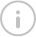

In [65]:
soup

<html lang="en" style="height: 100%;" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/"><head><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardrese
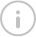

In [66]:
soup

In [1]:
a_tags = soup.find_all('a', {'class': 'jobLink css-1rd3saf eigr9kq2'})

#extract the href links from the anchor tags
href_links = ["https://glassdoor.co.in"+ a_tag['href'] for a_tag in a_tags]

print(href_links)

NameError: name 'soup' is not defined

In [69]:
len(href_links)

30

In [184]:
#jobLink css-1rd3saf eigr9kq2 for job links

In [185]:
a_tags = soup.find_all('div', {'class': 'p-std css-1k5huso e856ufb0'})

In [186]:
import re

#text = "We are looking for a full-stack developer with experience in Java, Python, C++, C#, JavaScript, Go, Ruby, PHP, Node.js, React.js, Angular, Vue.js, Django, Laravel, Express, Spring, MySQL, PostgreSQL, MongoDB, Redis, Cassandra, and other SQL and NoSQL databases."
text=a_tags[0].text
# Define regular expressions to match languages, frameworks, and databases
language_regex = re.compile(r"\b(ada|algol|assembly|awk|bash|basic|c(\+\+|#)?|cobol|coffeescript|d|dart|delphi|elixir|elm|erlang|f#|fortran|go|groovy|haskell|html|java|javascript|julia|kotlin|lisp|lua|matlab|objective-c|ocaml|pascal|perl|php|powershell|prolog|python|r|ruby|rust|scala|scheme|scratch|shell|smalltalk|sql|swift|tcl|typescript|vb\.net|visual basic|gin|graphTalk|icon|idl|io|j|jade|jscript|kixtart|labview|leda|livecode|lsl|m2001|maple|max/msp|mercury|mirah|monkey|msil|neko|nemerle|nxc|oberon|opencl|oz|pari/gp|pawn|pike|pure data|rebol|red|verilog|vhdl)\b", re.IGNORECASE)
#language_regex = re.compile(r"\b(assembly|c(\+\+|#)?|clojure|html|html5|css|css3|cobol|dart|delphi|erlang|f#|go|groovy|haskell|java|javascript|julia|kotlin|lisp|lua|matlab|objective-c|pascal|perl|php|python|r|ruby|rust|scala|swift|typescript|verilog|vhdl)\b", re.IGNORECASE)
#framework_regex = re.compile(r"\b(angular|backbone\.js|cakephp|django|flask|svelte|jquery|ember\.js|express|laravel|next\.js|node\.js|react\.js|ruby on rails|spring|vue\.js|yii)\b", re.IGNORECASE)
framework_regex = re.compile(r"\b(angular|backbone\.js|cakephp|cherrypy|cinder|conan|cppcms|django|docker|dropwizard|ember\.js|express|falcon|flask|google cloud platform|google test|grails|h2o\.ai|heroku|hibernate|hug|ibm cloud|apache hadoop|apache spark|apache tapestry|apache wicket|juce|keras|kubernetes|laravel|meteor|mxnet|next\.js|node\.js|nuxt\.js|openframeworks|openstack|poco|play|pyramid|pytorch|qt|react\.js|ruby on rails|sanic|scikit-learn|svelte|spark|spring|struts|tensorflow|theano|tornado|turboGears|vaadin|vue\.js|wxWidgets|yii)\b", re.IGNORECASE)

database_regex = re.compile(r"\b(cassandra|couchbase|couchdb|firebase|mongodb|ms sql|mysql|oracle|postgresql|redis|sqlite)\b", re.IGNORECASE)

# Extract the languages, frameworks, and databases from the text
languages = language_regex.findall(text)
frameworks = framework_regex.findall(text)
databases = database_regex.findall(text)

unique_languages = list(set([lang[0] for lang in languages]))
unique_frameworks = list(set(frameworks))
unique_databases= list(set(databases))

#print(unique_languages)print(unique_frameworks)
#print(unique_databases)
print(unique_databases+unique_frameworks+unique_languages)

['Docker', 'Kubernetes', 'C', 'Go', 'R']


In [123]:
df.iloc[29]["company_link"]

'glassdoor.co.in/partner/jobListing.htm?pos=130&ao=1136043&s=58&guid=00000187c0f356f39ddaf1cbd0565dfa&src=GD_JOB_AD&t=SR&vt=w&cs=1_53103db8&cb=1682569385976&jobListingId=1008496958487&jrtk=3-0-1gv0f6lp2gajk801-1gv0f6lpoghqf801-29d3d0a993e6ac95-'

In [124]:
df_sal=df[["salary estimate"]]

In [125]:
#df_sal=df_sal.dropna()

In [126]:
salaries=df_sal["salary estimate"]

In [127]:
salaries=list(salaries)

In [129]:
salaries

['₹2,00,000 /mo (est.)',
 '₹30,000 /mo (est.)',
 '₹3,47,052 /yr (est.)',
 '₹10,00,000 /yr (est.)',
 '₹32,500 /mo (est.)',
 '₹23,00,000 /yr (est.)',
 '₹5,00,799 /yr (est.)',
 '₹24,100 /mo (est.)',
 '₹3,56,542 /yr (est.)',
 '₹27,500 /mo (est.)',
 '₹10,00,000 /yr (est.)',
 '₹50,000 /mo (est.)',
 '₹4,26,690 /yr (est.)',
 nan,
 nan,
 nan,
 '₹18,000 /mo (est.)',
 '₹5,00,799 /yr (est.)',
 '₹65,000 /mo (est.)',
 '₹10,50,000 /yr (est.)',
 '₹4,89,722 /yr (est.)',
 '₹22,41,999 /yr (est.)',
 '₹15,00,000 /yr (est.)',
 '₹6,78,388 /yr (est.)',
 nan,
 '₹5,48,598 /yr (est.)',
 '₹5,36,656 /yr (est.)',
 '₹5,13,487 /yr (est.)',
 '₹3,83,035 /yr (est.)',
 nan,
 '₹3,25,611 /yr (est.)',
 nan,
 '₹11,50,000 /yr (est.)',
 nan,
 '₹41,500 /mo (est.)',
 '₹50,000 /mo (est.)',
 nan,
 nan,
 '₹3,75,731 /yr (est.)',
 '₹1,51,789 /yr (est.)',
 '₹4,97,885 /yr (est.)',
 '₹60,000 /mo (est.)',
 '₹2,54,467 /yr (est.)',
 '₹9,00,000 /yr (est.)',
 '₹3,57,805 /yr (est.)',
 '₹5,97,748 /yr (est.)',
 '₹4,31,833 /yr (est.)',
 '₹5,00,7

In [117]:
len(salaries)

49

In [118]:
salaries

['₹2,00,000 /mo (est.)',
 '₹30,000 /mo (est.)',
 '₹3,47,052 /yr (est.)',
 '₹10,00,000 /yr (est.)',
 '₹32,500 /mo (est.)',
 '₹23,00,000 /yr (est.)',
 '₹5,00,799 /yr (est.)',
 '₹24,100 /mo (est.)',
 '₹3,56,542 /yr (est.)',
 '₹27,500 /mo (est.)',
 '₹10,00,000 /yr (est.)',
 '₹50,000 /mo (est.)',
 '₹4,26,690 /yr (est.)',
 '₹18,000 /mo (est.)',
 '₹5,00,799 /yr (est.)',
 '₹65,000 /mo (est.)',
 '₹10,50,000 /yr (est.)',
 '₹4,89,722 /yr (est.)',
 '₹22,41,999 /yr (est.)',
 '₹15,00,000 /yr (est.)',
 '₹6,78,388 /yr (est.)',
 '₹5,48,598 /yr (est.)',
 '₹5,36,656 /yr (est.)',
 '₹5,13,487 /yr (est.)',
 '₹3,83,035 /yr (est.)',
 '₹3,25,611 /yr (est.)',
 '₹11,50,000 /yr (est.)',
 '₹41,500 /mo (est.)',
 '₹50,000 /mo (est.)',
 '₹3,75,731 /yr (est.)',
 '₹1,51,789 /yr (est.)',
 '₹4,97,885 /yr (est.)',
 '₹60,000 /mo (est.)',
 '₹2,54,467 /yr (est.)',
 '₹9,00,000 /yr (est.)',
 '₹3,57,805 /yr (est.)',
 '₹5,97,748 /yr (est.)',
 '₹4,31,833 /yr (est.)',
 '₹5,00,799 /yr (est.)',
 '₹3,75,180 /yr (est.)',
 '₹5,26,498 /

In [119]:
def convert_salary_to_lpa(salary_str):
    salary = salary_str.split()[0]
    if 'mo' in salary_str:
        return round(float(salary.replace(',', '')[1:]) * 12 / 100000, 2)
    elif 'yr' in salary_str:
        return round(float(salary.replace(',', '')[1:]) / 100000, 2)
    elif '/hr' in salary_str:
        return round(float(salary.replace(',', '')[1:]) * 8 * 300 / 100000, 2)  # Assuming 8 hours of work per day and 300 working days per year
    else:
        return None
lpa_salaries = [convert_salary_to_lpa(salary) for salary in salaries]
print(lpa_salaries)    
    
    

[24.0, 3.6, 3.47, 10.0, 3.9, 23.0, 5.01, 2.89, 3.57, 3.3, 10.0, 6.0, 4.27, 2.16, 5.01, 7.8, 10.5, 4.9, 22.42, 15.0, 6.78, 5.49, 5.37, 5.13, 3.83, 3.26, 11.5, 4.98, 6.0, 3.76, 1.52, 4.98, 7.2, 2.54, 9.0, 3.58, 5.98, 4.32, 5.01, 3.75, 5.26, 4.35, 5.84, 14.0, 4.33, 5.17, 3.79, 5.42, 4.66]


In [120]:
def convert_salary_to_thousands_per_month(salary_str):
    salary = salary_str.split()[0]
    if 'mo' in salary_str:
        return round(float(salary.replace(',', '')[1:]) / 1000, 2)
    elif 'yr' in salary_str:
        return round(float(salary.replace(',', '')[1:]) / 12000, 2)
    elif '/hr' in salary_str:
        return round(float(salary.replace(',', '')[1:]) * 8 * 300 / 120000, 2)  # Assuming 8 hours of work per day and 300 working days per year
    else:
        return None

salaries_in_thousands_per_month = [convert_salary_to_thousands_per_month(salary) for salary in salaries]
print(salaries_in_thousands_per_month)

[200.0, 30.0, 28.92, 83.33, 32.5, 191.67, 41.73, 24.1, 29.71, 27.5, 83.33, 50.0, 35.56, 18.0, 41.73, 65.0, 87.5, 40.81, 186.83, 125.0, 56.53, 45.72, 44.72, 42.79, 31.92, 27.13, 95.83, 41.5, 50.0, 31.31, 12.65, 41.49, 60.0, 21.21, 75.0, 29.82, 49.81, 35.99, 41.73, 31.27, 43.87, 36.21, 48.69, 116.67, 36.08, 43.08, 31.62, 45.18, 38.8]


In [89]:
df=df.drop(["salary estimate"],axis=1)

In [90]:
df

,company,job title,company_link,location,job description
0,SourceFuse Technologies\n4.2,ML Engineer (Generative AI),glassdoor.co.in/partner/jobListing.htm?pos=101...,Hyderābād,Experience Required - 2-8 years\nAnalyze data ...
1,TECH-CITY Research & Consulting Pvt Ltd\n4.0,AI / ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=102...,Pune,"Job description\nAs an ML Engineer, you will b..."
2,Apping Technology\n4.8,AI/ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=103...,New Delhi,"Delhi, India\nWe are looking for a Machine Lea..."
3,Larsen & Toubro Limited\n3.4,AI-ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=104...,Vadodara,"Roles and Responsibilities\nArchitect, build a..."
4,Genrobotic Innovations,AI/ML Engineer [1-2 Years],glassdoor.co.in/partner/jobListing.htm?pos=105...,Thiruvananthapuram,We are looking to hire an AI/ML engineer with ...
5,Entrupy\n2.1,Computer Vision/ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=106...,Bangalore,About Entrupy\nEntrupy is a global technology ...
6,Facctum Solutions,AI-ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=107...,Bangalore,Job Description\nAs a Machine Learning / Artif...
7,INFYSEC,ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=108...,India,2-3 years Experience\nAbility to work in a syn...
8,Cognizant\n3.9,MLOps Engineer,glassdoor.co.in/partner/jobListing.htm?pos=109...,Chennai,ML Ops\n\nRequired Skills:\nLooking for profil...
9,DCS Robotics,Embedded AI/ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=110...,Cochin,Job Description\nAt least 1 years of work expe...


In [61]:
len(df)

60

In [62]:
df=df.dropna()

In [63]:
df

,company,job title,company_link,location,job description
0,SourceFuse Technologies\n4.2,ML Engineer (Generative AI),glassdoor.co.in/partner/jobListing.htm?pos=101...,Hyderābād,Experience Required - 2-8 years\nAnalyze data ...
1,TECH-CITY Research & Consulting Pvt Ltd\n4.0,AI / ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=102...,Pune,"Job description\nAs an ML Engineer, you will b..."
2,Apping Technology\n4.8,AI/ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=103...,New Delhi,"Delhi, India\nWe are looking for a Machine Lea..."
3,Larsen & Toubro Limited\n3.4,AI-ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=104...,Vadodara,"Roles and Responsibilities\nArchitect, build a..."
4,Genrobotic Innovations,AI/ML Engineer [1-2 Years],glassdoor.co.in/partner/jobListing.htm?pos=105...,Thiruvananthapuram,We are looking to hire an AI/ML engineer with ...
5,Entrupy\n2.1,Computer Vision/ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=106...,Bangalore,About Entrupy\nEntrupy is a global technology ...
6,Facctum Solutions,AI-ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=107...,Bangalore,Job Description\nAs a Machine Learning / Artif...
7,INFYSEC,ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=108...,India,2-3 years Experience\nAbility to work in a syn...
8,Cognizant\n3.9,MLOps Engineer,glassdoor.co.in/partner/jobListing.htm?pos=109...,Chennai,ML Ops\n\nRequired Skills:\nLooking for profil...
9,DCS Robotics,Embedded AI/ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=110...,Cochin,Job Description\nAt least 1 years of work expe...


In [64]:
len(df)

59

In [65]:
df["job description"][5]

"About Entrupy\nEntrupy is a global technology company whose mission is to protect businesses, borders and consumers from transacting in counterfeit goods. Entrupy has developed a patented technology system which utilizes a combination of AI and computer vision to instantly identify and authenticate high value physical goods.\n\nEntrupy’s solutions serve business customers including leading luxury brands, retailers, e-commerce marketplaces and online resellers in over 60 countries. Entrupy is growing quickly with team members based in the US, India, Japan and Brazil.\n\nEntrupy’s solutions in market:\nEntrupy Luxury Authentication\nEntrupy Sneaker Authentication\nEntrupy Fingerprinting\n\nWe, at Entrupy, are building the world's best authentication engine for high value goods. We've grown multifold in the last couple of years and work with some of the best retailers (online/offline) around the world. As an ML Engineer, you will get to work with some of the best brains in the industry w

In [66]:
print(df)

                                              company  \
0                        SourceFuse Technologies\n4.2   
1        TECH-CITY Research & Consulting Pvt Ltd\n4.0   
2                              Apping Technology\n4.8   
3                        Larsen & Toubro Limited\n3.4   
4                              Genrobotic Innovations   
5                                        Entrupy\n2.1   
6                                   Facctum Solutions   
7                                             INFYSEC   
8                                      Cognizant\n3.9   
9                                        DCS Robotics   
10                                         Flipped.ai   
11                                     Msigma Gokulam   
12                                          GoTo\n3.9   
13                               YOROSIS Technologies   
14                                     Accenture\n4.1   
15                                     Aidaptive\n4.7   
16                             

In [67]:
df["job description"][4]

"We are looking to hire an AI/ML engineer with 1-2 years of work experience with an analytical mind and a detailed understanding of developing, implementing, and maintaining intelligent algorithms and systems. Should have a Bachelor's or Master's degree in Computer Science, Data Science, or a related field, as well as experience in machine learning, data analysis, and software development. Strong programming skills, particularly in Python.\nDuties & Responsibilities :\nData Collection and Processing: The AI/ML Engineer will be responsible for collecting, processing, and managing data sets for use in machine learning models. They will work with data scientists and data engineers to ensure that data is clean, reliable, and useful for analysis.\nModel Development and Training: The AI/ML Engineer will design, develop, and train machine learning models that can be used to analyze large amounts of data. They will use various machine learning algorithms and techniques to create models that ca

In [68]:
import re

#text = "We are looking for a full-stack developer with experience in Java, Python, C++, C#, JavaScript, Go, Ruby, PHP, Node.js, React.js, Angular, Vue.js, Django, Laravel, Express, Spring, MySQL, PostgreSQL, MongoDB, Redis, Cassandra, and other SQL and NoSQL databases."
text=df["job description"][9]
# Define regular expressions to match languages, frameworks, and databases
language_regex = re.compile(r"\b(ada|algol|assembly|awk|bash|basic|c(\+\+|#)?|cobol|coffeescript|d|dart|delphi|elixir|elm|erlang|f#|fortran|go|groovy|haskell|html|java|javascript|julia|kotlin|lisp|lua|matlab|objective-c|ocaml|pascal|perl|php|powershell|prolog|python|r|ruby|rust|scala|scheme|scratch|shell|smalltalk|sql|swift|tcl|typescript|vb\.net|visual basic|gin|graphTalk|icon|idl|io|j|jade|jscript|kixtart|labview|leda|livecode|lsl|m2001|maple|max/msp|mercury|mirah|monkey|msil|neko|nemerle|nxc|oberon|opencl|oz|pari/gp|pawn|pike|pure data|rebol|red|verilog|vhdl)\b", re.IGNORECASE)
#language_regex = re.compile(r"\b(assembly|c(\+\+|#)?|clojure|html|html5|css|css3|cobol|dart|delphi|erlang|f#|go|groovy|haskell|java|javascript|julia|kotlin|lisp|lua|matlab|objective-c|pascal|perl|php|python|r|ruby|rust|scala|swift|typescript|verilog|vhdl)\b", re.IGNORECASE)
#framework_regex = re.compile(r"\b(angular|backbone\.js|cakephp|django|flask|svelte|jquery|ember\.js|express|laravel|next\.js|node\.js|react\.js|ruby on rails|spring|vue\.js|yii)\b", re.IGNORECASE)
framework_regex = re.compile(r"\b(angular|backbone\.js|cakephp|cherrypy|cinder|conan|cppcms|django|docker|dropwizard|ember\.js|express|falcon|flask|google cloud platform|google test|grails|h2o\.ai|heroku|hibernate|hug|ibm cloud|apache hadoop|apache spark|apache tapestry|apache wicket|juce|keras|kubernetes|laravel|meteor|mxnet|next\.js|node\.js|nuxt\.js|openframeworks|openstack|poco|play|pyramid|pytorch|qt|react\.js|ruby on rails|sanic|scikit-learn|svelte|spark|spring|struts|tensorflow|theano|tornado|turboGears|vaadin|vue\.js|wxWidgets|yii)\b", re.IGNORECASE)

database_regex = re.compile(r"\b(cassandra|couchbase|couchdb|firebase|mongodb|ms sql|mysql|oracle|postgresql|redis|sqlite)\b", re.IGNORECASE)

# Extract the languages, frameworks, and databases from the text
languages = language_regex.findall(text)
frameworks = framework_regex.findall(text)
databases = database_regex.findall(text)

unique_languages = list(set([lang[0] for lang in languages]))
unique_frameworks = list(set(frameworks))
unique_databases= list(set(databases))

#print(unique_languages)print(unique_frameworks)
#print(unique_databases)
print(unique_databases+unique_frameworks+unique_languages)


['Tensorflow', 'Keras', 'PyTorch', 'C', 'Python']


In [69]:
len(df["job description"])

59

In [73]:
df.reset_index(inplace=True, drop=True)

In [74]:
df

,company,job title,company_link,location,job description
0,SourceFuse Technologies\n4.2,ML Engineer (Generative AI),glassdoor.co.in/partner/jobListing.htm?pos=101...,Hyderābād,Experience Required - 2-8 years\nAnalyze data ...
1,TECH-CITY Research & Consulting Pvt Ltd\n4.0,AI / ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=102...,Pune,"Job description\nAs an ML Engineer, you will b..."
2,Apping Technology\n4.8,AI/ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=103...,New Delhi,"Delhi, India\nWe are looking for a Machine Lea..."
3,Larsen & Toubro Limited\n3.4,AI-ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=104...,Vadodara,"Roles and Responsibilities\nArchitect, build a..."
4,Genrobotic Innovations,AI/ML Engineer [1-2 Years],glassdoor.co.in/partner/jobListing.htm?pos=105...,Thiruvananthapuram,We are looking to hire an AI/ML engineer with ...
5,Entrupy\n2.1,Computer Vision/ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=106...,Bangalore,About Entrupy\nEntrupy is a global technology ...
6,Facctum Solutions,AI-ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=107...,Bangalore,Job Description\nAs a Machine Learning / Artif...
7,INFYSEC,ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=108...,India,2-3 years Experience\nAbility to work in a syn...
8,Cognizant\n3.9,MLOps Engineer,glassdoor.co.in/partner/jobListing.htm?pos=109...,Chennai,ML Ops\n\nRequired Skills:\nLooking for profil...
9,DCS Robotics,Embedded AI/ML Engineer,glassdoor.co.in/partner/jobListing.htm?pos=110...,Cochin,Job Description\nAt least 1 years of work expe...


In [77]:
for i in range(len(df["job description"])):
    text=df["job description"][i]
  # Define regular expressions to match languages, frameworks, and databases
  
    language_regex = re.compile(r"\b(ada|algol|assembly|awk|bash|basic|c(\+\+|#)?|cobol|coffeescript|d|dart|delphi|elixir|elm|erlang|f#|fortran|go|groovy|haskell|html|java|javascript|julia|kotlin|lisp|lua|matlab|objective-c|ocaml|pascal|perl|php|powershell|prolog|python|r|ruby|rust|scala|scheme|scratch|shell|smalltalk|sql|swift|tcl|typescript|vb\.net|visual basic)\b", re.IGNORECASE)

    framework_regex = re.compile(r"\b(angular|aurelia|backbone\.js|bootstrap|bulma|cakephp|cherrypy|django|docker|ember\.js|express|fastapi|feathers\.js|flask|gatsby\.js|google cloud platform|grails|hapi\.js|hugo|ibm cloud|ionic|jest|jquery|koa|laravel|loopback|meteor|nestjs|next\.js|nuxt\.js|openstack|phoenix|polymer|pyramid|quasar|react\.js|redux|restify|ruby on rails|sails\.js|sanic|serverless|sinatra|socket\.io|strapi|styled-components|symfony|thunderbird|tornado|turboGears|uwsgi|vaadin|vue\.js|vuex|wxWidgets|yarn|yesod|zepto)\b", re.IGNORECASE)

    database_regex = re.compile(r"\b(cassandra|couchbase|couchdb|firebase|mongodb|ms sql|mysql|oracle|postgresql|redis|sqlite)\b", re.IGNORECASE)

    skills_regex = re.compile(r"\b(amazon web services|aws|ansible|apache kafka|apache mesos|apache zookeeper|aws cloudformation|aws cloudwatch|aws lambda|azure|chef|circleci|cloudflare|docker|gcp|git|github|gitlab|jenkins|kubernetes|logstash|nginx|prometheus|puppet|redis|terraform|travis ci)\b", re.IGNORECASE)
    # Extract the languages, frameworks, and databases from the text
    languages = language_regex.findall(text)
    frameworks = framework_regex.findall(text)
    databases = database_regex.findall(text)
    skills=skills_regex.findall(text)

    unique_languages = list(set([lang[0].lower() for lang in languages]))
#     unique_frameworks = list(set(frameworks))
#     unique_databases= list(set(databases))
#     unique_skills=list(set(skills))
    unique_frameworks = list(set(unique.lower() for unique in frameworks))
    unique_databases = list(set(unique.lower() for unique in databases))
    unique_skills = list(set(unique.lower() for unique in skills))
     

    #print(unique_languages)print(unique_frameworks)
    #print(unique_databases)
    print(unique_databases+unique_frameworks+unique_languages+unique_skills)
    

[]
['python']
['r', 'python', 'java', 'd']
['c', 'python', 'r', 'matlab', 'azure']
['basic', 'python']
['python']
['angular', 'flask', 'backbone.js', 'jquery', 'django', 'r', 'd', 'javascript', 'perl', 'python', 'aws']
['c', 'python']
['python', 'aws', 'azure', 'gcp']
['c', 'python']
['bash', 'python', 'matlab']
['sql', 'r', 'python', 'd']
['c', 'python', 'java']
[]
['r', 'python']
['typescript', 'javascript', 'html']
['python', 'git']
['c', 'python']
['r', 'python']
[]
['python', 'git', 'aws', 'azure', 'gcp']
['docker', 'r', 'python', 'java', 'aws', 'kubernetes', 'docker']
['google cloud platform', 'docker', 'basic', 'r', 'd', 'sql', 'python', 'github', 'docker', 'kubernetes', 'gcp']
[]
['python']
['angular', 'c', 'java', 'javascript', 'd']
['mongodb', 'couchbase', 'express', 'sql', 'shell', 'python', 'java', 'aws', 'github', 'gcp']
['basic', 'python', 'github']
['python']
['basic', 'python']
['oracle', 'mysql', 'sql', 'python']
['c', 'python', 'aws', 'azure']
['docker', 'r', 'python'

In [76]:
''''
    language_regex = re.compile(r"\b(ada|algol|assembly|awk|bash|basic|c(\+\+|#)?|cobol|coffeescript|d|dart|delphi|elixir|elm|erlang|f#|fortran|go|groovy|haskell|html|java|javascript|julia|kotlin|lisp|lua|matlab|objective-c|ocaml|pascal|perl|php|powershell|prolog|python|r|ruby|rust|scala|scheme|scratch|shell|smalltalk|sql|swift|tcl|typescript|vb\.net|visual basic|gin|graphTalk|icon|idl|io|j|jade|jscript|kixtart|labview|leda|livecode|lsl|m2001|maple|max/msp|mercury|mirah|monkey|msil|neko|nemerle|nxc|oberon|opencl|oz|pari/gp|pawn|pike|pure data|rebol|red|verilog|vhdl)\b", re.IGNORECASE)
    #language_regex = re.compile(r"\b(assembly|c(\+\+|#)?|clojure|html|html5|css|css3|cobol|dart|delphi|erlang|f#|go|groovy|haskell|java|javascript|julia|kotlin|lisp|lua|matlab|objective-c|pascal|perl|php|python|r|ruby|rust|scala|swift|typescript|verilog|vhdl)\b", re.IGNORECASE)
    #framework_regex = re.compile(r"\b(angular|backbone\.js|cakephp|django|flask|svelte|jquery|ember\.js|express|laravel|next\.js|node\.js|react\.js|ruby on rails|spring|vue\.js|yii)\b", re.IGNORECASE)
    framework_regex = re.compile(r"\b(angular|backbone\.js|cakephp|cherrypy|cinder|conan|cppcms|django|docker|dropwizard|ember\.js|express|falcon|flask|google cloud platform|google test|grails|h2o\.ai|heroku|hibernate|hug|ibm cloud|apache hadoop|apache spark|apache tapestry|apache wicket|juce|keras|kubernetes|laravel|meteor|mxnet|next\.js|node\.js|nuxt\.js|openframeworks|openstack|poco|play|pyramid|pytorch|qt|react\.js|ruby on rails|sanic|scikit-learn|svelte|spark|spring|struts|tensorflow|theano|tornado|turboGears|vaadin|vue\.js|wxWidgets|yii)\b", re.IGNORECASE)

    database_regex = re.compile(r"\b(cassandra|couchbase|aws|github|git|couchdb|firebase|mongodb|ms sql|mysql|oracle|postgresql|redis|sqlite)\b", re.IGNORECASE)
    ''''

SyntaxError: EOL while scanning string literal (149085786.py, line 8)

In [48]:
df["job description"][7]

'Role: Data Science Profile\nExperience: 3-8\nKey Responsibilities:\n· Ability to understand the problem statement and implement data science solutions & techniques independently\n· Work with stakeholders throughout the organization to identify opportunities for leveraging company data to drive business solutions\n· Conduct research and prototyping\n· Ability to deliver AI/ML based solutions around host of problems: Customer Segmentation & Targeting, Propensity Modelling, Churn Modelling, Lifetime Value Estimation, Forecasting, Recommender Systems, Modelling Response to Incentives, Media Mix Optimization, Price Optimization, EDA, etc.\n· Collaborate and Coordinate with different functional teams (DE and Product development) to implement models and monitor outcomes.\n· Lead conversations with clients and stakeholders to effectively integrate and communicate analysis findings\n· Contribute to drive stand-alone projects as a program manager\n· Guide and mentor junior consultants.\nTools/L

In [177]:
import spacy

In [146]:
#pip install spacy


In [147]:
nlp=spacy.load("en_core_web_sm")

In [148]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [149]:
doc=nlp(df["job description"][0])
#doc=nlp("Hello iam Ajay. Iam Software Engineer who is experienced in python and ML and is currently working in Amazon. Iused to work at PrevalentAi before.")
#doc=nlp("Save me Iam tuck in the floods at London my phone no is 9446581801")
for ent in doc.ents:
    print(ent.text, " ", ent.label_)


Node.js (Backend   ORG
Node   GPE
Js   GPE
At least 3+ years   DATE
Server Side   PERSON
express.js   PERSON
first   ORDINAL
PHP   ORG
JavaScript   PRODUCT
SOA   ORG
SVN   ORG
AWS   ORG
Heroku   GPE
HTML5   ORG
CSS3   ORG
Superb   NORP
B.E. in Computer Science   ORG
Computer Science   ORG
Write &   ORG
REST   ORG
Continuous   PERSON
30,000   CARDINAL
8 hours   TIME
5 days   DATE
learn & grow   ORG
₹   ORG
600,000.00   MONEY
900,000.00   GPE
Schedule   PERSON
Day   DATE
Monday to Friday   DATE
Yearly   DATE
Application Question(s   PRODUCT
SQL   ORG
NoSQL   GPE
at least 3 years   DATE
SOA   ORG
monthly   DATE
INR   GPE
monthly   DATE
INR   GPE
3 years   DATE
Show Less
Report   WORK_OF_ART


In [78]:
df["job description"][12]

'We’re looking for a skilled Java backend developer having minimum of 4-5 years of experienceto join our team of developers consistently raising the bar on product development.\nLocation- Remote\nMust have strong experience in Core Java, Spring and/or Spring Boot, Multithreading, Hibernate, Microservices and SQL..\nExperience in Relational Database System SQL or Oracle.\nExperienced in building complex secure REST based services using Spring Framework.\nGood knowledge in Design patterns, Design principles & memory Management\nGood in GIT, Bitbucket or relevant tools.\nHands-on individual responsible for producing excellent quality of code, adhering to expected coding standards and industry best practices.\nHave good fundamental knowledg of Rest Services, DB Querying. JMS, TDD, JQuery etc. are good to have.\nMust have strong knowledge on Data structure and Algorithm.\nShould be familiar with cloud like AWS and Azure\nRole requires member to work directly with client on a day on day basi